# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

## Common Machine Learning Evaluation Metrics

### Classification Metrics

**1. Accuracy**
$$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$$

**2. Precision** (How many predicted positives are actually positive?)
$$\text{Precision} = \frac{TP}{TP + FP}$$

**3. Recall/Sensitivity** (How many actual positives did we find?)
$$\text{Recall} = \frac{TP}{TP + FN}$$

**4. F1-Score** (Harmonic mean of Precision and Recall)
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Where: **TP** = True Positives, **TN** = True Negatives, **FP** = False Positives, **FN** = False Negatives

### Regression Metrics

**1. Mean Absolute Error (MAE)**
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

**2. Mean Squared Error (MSE)**
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**3. Root Mean Squared Error (RMSE)**
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

---

In [1]:
# Import libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Set random seed
rng = np.random.default_rng(seed=42)

In [2]:
# Load California Housing dataset
dataset = datasets.fetch_california_housing()
# Print dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [ ]:
# Print original target values
print("Orignal target values:", dataset.target)

# Convert target values to integers (for classification)
dataset.target = dataset.target.astype(int)

# Print updated target values and data shapes
print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

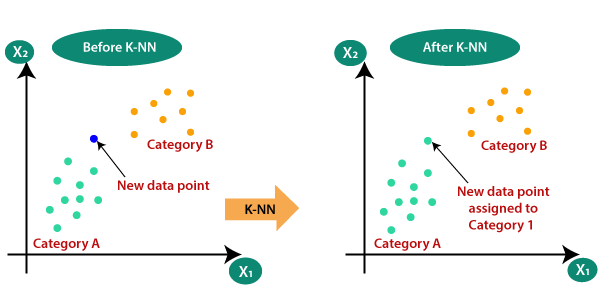

In [4]:
def NN1(traindata, trainlabel, query):
    """Predict label for a single query using Nearest Neighbor."""
    # Calculate distances to all training points
    diff = (traindata - query)
    sq = diff * diff
    dist = sq.sum(1)
    # Return label of the closest training point
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """Predict labels for test data using Nearest Neighbor."""
    # Apply NN1 to each test data point
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [7]:
def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [8]:
def Accuracy(gtlabel, predlabel):
    """Calculate accuracy."""
    # Check if lengths match
    assert len(gtlabel) == len(predlabel), "Lengths must be the same"
    # Count correct predictions
    correct = (gtlabel == predlabel).sum()
    # Calculate accuracy
    return correct / len(gtlabel)

In [12]:
y_true = np.array([1,0,1,1,0,1])
y_pred = np.array([1,0,0,1,0,1])
acc = Accuracy(y_true, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8333333333333334


Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [14]:
def split(data, label, percent):
    """Split data into two sets based on percentage."""
    # Generate random numbers
    rnd = rng.random(len(label))
    # Create masks for splitting
    split1 = rnd < percent
    split2 = rnd >= percent

    # Split data and labels
    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    # Return split data
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [18]:
# Split data into test (20%) and training/validation (80%)
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)

print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4020
Number of train samples: 16620
Percent of test data: 19.476744186046513 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [19]:
# Split training/validation data into training (75%) and validation (25%)
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [22]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def print_classification_metrics(true_labels, pred_labels):
    """
    Calculate and print classification metrics
    """
    # Ensure labels are integers for classification metrics
    true_labels = true_labels.astype(int)
    pred_labels = pred_labels.astype(int)

    # For multi-class, we'll use macro averaging
    # Calculate Precision, Recall, F1-Score, and Accuracy
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
    accuracy = np.mean(true_labels == pred_labels)

    # Print the calculated metrics
    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")

    # Return the calculated metrics
    return accuracy, precision, recall, f1

def print_regression_metrics(true_values, pred_values):
    """
    Calculate and print regression metrics
    """
    # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Print the calculated metrics
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    rmse = np.sqrt(mse)

    # Print metrics
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return mae, mse, rmse

# Example: Evaluate validation set with multiple classification metrics
print("=== Validation Set Classification Metrics ===")
# Predict labels for the validation data using the Nearest Neighbor classifier
valpred = NN(traindata, trainlabel, valdata)
# Print the classification metrics for the validation set
print_classification_metrics(vallabel, valpred)

=== Validation Set Classification Metrics ===
Accuracy:  33.70%
Precision: 25.67%
Recall:    24.33%
F1-Score:  24.81%


(np.float64(0.3369909778102902),
 0.2566744608650522,
 0.24329220693060372,
 0.24812733776799886)

=== Confusion Matrix for Validation Set ===


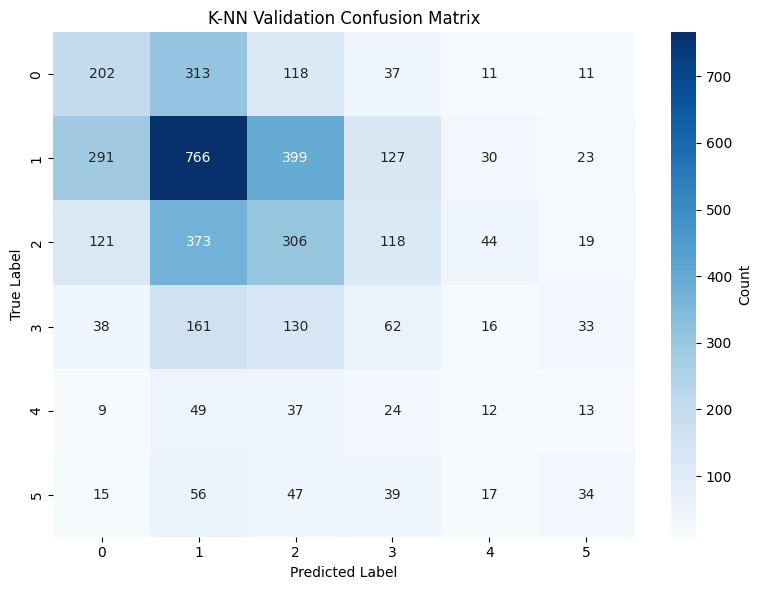

Confusion Matrix Shape: (6, 6)
Total Predictions: 4101


In [24]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix # Import confusion_matrix here as it's used in this cell

def plot_confusion_matrix(true_labels, pred_labels, title="Confusion Matrix"):
    """Plot confusion matrix heatmap."""
    # Ensure labels are integers for confusion matrix
    true_labels = true_labels.astype(int)
    pred_labels = pred_labels.astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar_kws={'label': 'Count'})
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Print matrix shape and total predictions
    print(f"Confusion Matrix Shape: {cm.shape}")
    print(f"Total Predictions: {cm.sum()}")

# Visualize confusion matrix for validation
print("=== Confusion Matrix for Validation Set ===")
# Predict on validation data
valpred = NN(traindata, trainlabel, valdata)
# Plot confusion matrix
plot_confusion_matrix(vallabel, valpred,
                     title="K-NN Validation Confusion Matrix")

What is the accuracy of our classifiers on the train dataset?

In [25]:
# Calculate training accuracy for NN
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

# Calculate training accuracy for Random Classifier
trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  0.0319514338205927 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [26]:
# Calculate validation accuracy for NN
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

# Calculate validation accuracy for Random Classifier
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 0.975371860521824 %
Validation accuracy using random classifier: 0.0243842965130456 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [27]:
# Perform another random split for validation
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
# Predict and calculate accuracy for the new split
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 1.116504854368932 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [30]:
# Calculate test accuracy for NN
# Train on all training data
testpred = NN(alltraindata, alltrainlabel, testdata)
# Calculate test accuracy
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 0.7960199004975124 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1. If we increase the validation set percentage, there will be only few samples left to train, so the model may learn less and accuracy reduces.

2. If the training set is too small, the model may not learn enough patterns which leads to poor validation and test accuracy. If the validation set is too small, its accuracy may not show the true performance of model.A balanced split gives a better estimate of how the model can work on new data.

3. A good percentage to reserve for validation set is usually 20% of the total data. This will give the model enough data (80%) to learn well while keeping enough samples (20%) to test how well it performs on unseen data.

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

Accuracy with 1 Neighbor: 0.9
Accuracy with 3 Neighbors: 0.9


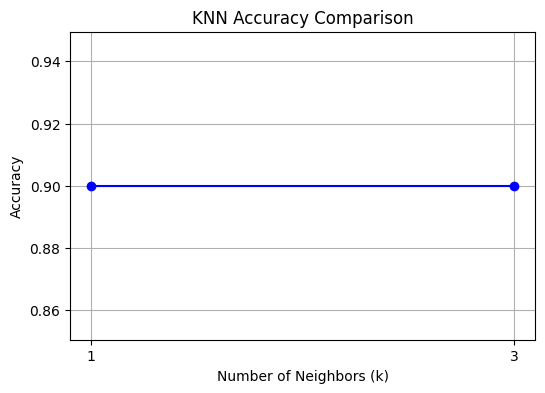

In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data     # features
y = data.target   # labels

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Create and train the 1-nearest neighbor classifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

# Create and train the 3-nearest neighbor classifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# Predict on the test set
y_pred1 = knn1.predict(X_test)
y_pred3 = knn3.predict(X_test)

# Calculate accuracy
acc1 = accuracy_score(y_test, y_pred1)
acc3 = accuracy_score(y_test, y_pred3)

print("Accuracy with 1 Neighbor:", acc1)
print("Accuracy with 3 Neighbors:", acc3)

# Plot both accuracies on a graph
neighbors = [1, 3]
accuracies = [acc1, acc3]

plt.figure(figsize=(6, 4))
plt.plot(neighbors, accuracies, marker='o', linestyle='-', color='blue')
plt.title("KNN Accuracy Comparison")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.grid(True)
plt.show()

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [34]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """Calculate average accuracy over multiple splits."""
    accuracy = 0
    # Loop through iterations
    for ii in range(iterations):
        # Split data
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        # Predict on validation data and add to accuracy
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    # Return average accuracy
    return accuracy / iterations

In [35]:
# Calculate average validation accuracy (10 iterations)
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")

# Calculate test accuracy
testpred = NN(alltraindata, alltrainlabel, testdata)
print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 0.9738385806552239 %
Test accuracy: 0.7960199004975124 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**Answers**

  1A. Yes, It reduces the effect of random variations in train-test splits.It reduces fluctuations caused by test samples, which gives a more stable and reliable stimate of model performance across different data subsets.

  2A.  Yes, It reduces bias from a single split, producing a performance estimate that better reflects expected accuracy on unseen data. It provides a closer estimate of real world test accuracy.

  3A.Increasing iterations reduces variance in the accuracy estimate, giving more reliable results. Higher iterations will provide a better representation of model performance across different data subsets.But after a certain point, extra iterations give little extra benefit and just take more computing time.


4A. partially, More iterations will allow repeated sampling, improing stability of estimations for small datasets. But, very small datasets may produce high variance, and the model may overfit. Increasing iterations helps but they can't fully fix too little data.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

The accuracy of 3 narest neighbour classifier becomes more stable as the number of splits increases as averaging reduces random variations from different train-test divisions. Larger training sets improve accuracy while smaller sets increase variancee. Compared to 1 nearest neighbour classifier, which is very sensitive to individual points and dluctuates more, 3 nearest neighbour classifier gives steadier and more realiable results , though sometimes slightly lower than 1 nearest  neighbour's peak accuracy.